# 数据报告

## 问题：棒球运动员的薪水和哪些因素有关

我们假定棒球运动员的薪水与以下几个因素密切相关

- 时间（以年份计算）

- 球队获胜场次： 球队获胜场次越多，球队总体理应得到更高薪水

- 球员身高，体重，年龄，入行年限理应与球员薪水有一定的相关


In [665]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##  1. 球员薪水随时间变化

假设：随着经济发展水平提高，以及球员自身能力、联赛自身发展以及人民群众的广泛参与，球员的薪水总体上一直处于上涨状态。

现在我们围绕球员薪水随着年份变化的关系展开数据探索。

### 1.1 导入`Salaries.csv`数据

In [666]:
salariesFileName = './baseballdatabank-2017.1/core/Salaries.csv'
salariesDF = pd.read_csv(salariesFileName)

In [667]:
# 查看每一列的数据类型
salariesDF.dtypes

yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object

In [668]:
# 查看前几行数据
salariesDF.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [669]:
# 描述数据分布情况
salariesDF.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


### 1.2 整理`Salaries.csv`数据

查看薪水数据里面有没有null值：

In [670]:
pd.isnull(salariesDF).sum()

yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64

由于没有发现null值，我们无需对这种情况进行任何处理。

接下来，检查薪水数据里面有没有0或者负数：

In [671]:
salariesDF[salariesDF["salary"] <= 0]

,yearID,teamID,lgID,playerID,salary
6179,1993,NYA,AL,jamesdi01,0
12007,1999,PIT,NL,martija02,0


我们来查看`jamesdi01`球员的全部薪水记录：

In [672]:
salariesDF[salariesDF["playerID"] == "jamesdi01"]

,yearID,teamID,lgID,playerID,salary
1302,1987,ATL,NL,jamesdi01,120000
1929,1988,ATL,NL,jamesdi01,360000
2591,1989,ATL,NL,jamesdi01,400000
3536,1990,CLE,AL,jamesdi01,650000
5293,1992,NYA,AL,jamesdi01,387500
6179,1993,NYA,AL,jamesdi01,0
8019,1995,NYA,AL,jamesdi01,350000


我们把这个球员在`1992`年和`1995`年这两年的平均工资赋值给`1993`年的工资：

In [673]:
salariesDF['salary'].iloc[6179] = (387500 + 350000)/2

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [674]:
# 查看更新之后的数据记录
salariesDF[salariesDF["playerID"] == "jamesdi01"]

,yearID,teamID,lgID,playerID,salary
1302,1987,ATL,NL,jamesdi01,120000.0
1929,1988,ATL,NL,jamesdi01,360000.0
2591,1989,ATL,NL,jamesdi01,400000.0
3536,1990,CLE,AL,jamesdi01,650000.0
5293,1992,NYA,AL,jamesdi01,387500.0
6179,1993,NYA,AL,jamesdi01,368750.0
8019,1995,NYA,AL,jamesdi01,350000.0


In [675]:
# 我们来查看jamesdi01球员的全部薪水记录：
salariesDF[salariesDF["playerID"] == "martija02"]

,yearID,teamID,lgID,playerID,salary
11011,1998,PIT,NL,martija02,170000.0
12007,1999,PIT,NL,martija02,0.0


这名球员在1997年的薪水跟球员`jamesdi01`在1987年的薪水处于同一水平，而且有关此人的数据记录只有两条。

我们再来查看其他球员的记录条数：

In [676]:
salariesDF.groupby(['playerID']).agg([ 'count'])['yearID'].head()

,count
playerID,
aardsda01,7
aasedo01,4
abadan01,1
abadfe01,5
abbotje01,4


In [677]:
# 咱们干脆把这条数据干掉吧
salariesDF.drop(salariesDF.index[[12007]], inplace=True)

# 我们来再次查看jamesdi01球员的全部薪水记录：
salariesDF[salariesDF["playerID"] == "martija02"]

,yearID,teamID,lgID,playerID,salary
11011,1998,PIT,NL,martija02,170000.0


### 1.3 可视化分析

我们来可视化薪水额度频率分布的柱状图。

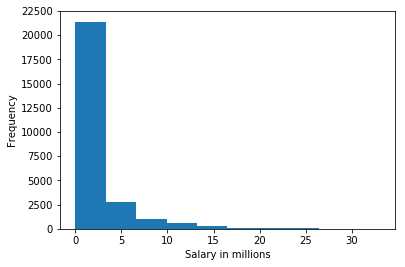

In [678]:
%matplotlib inline
plt.hist(salariesDF["salary"]/1000000, bins = 10)
plt.ylabel("Frequency")
plt.xlabel("Salary in millions")
plt.show()

从上面的分布可以看出大多数球员的薪水都在五百万以下。

我们来计算一个每年球员的平均薪水额度：

In [679]:
salaryYearDF = salariesDF[['yearID', 'salary']].groupby(['yearID']).median()

salaryYearDF.head()

,salary
yearID,
1985,400000.0
1986,294404.0
1987,285000.0
1988,295000.0
1989,300000.0


我们来可视化薪水额度随着年份分布的柱状图

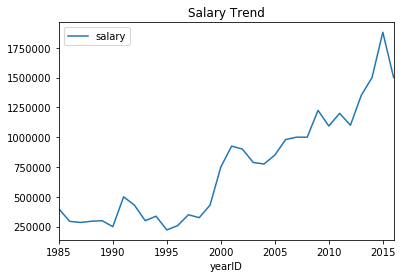

In [680]:
# 生成折线图
salaryYearDF.plot(title='Salary Trend')

### 1.4 结论

根据折线图的显示，球员们每年的的平均工资（这里是当年全部球员薪水的中位数），总体上随着时间的推移在逐年上升，大约2015年的时候达到顶峰。

之后薪水水平略有回调。

## 2. 球员薪水与球队赢球次数

一般情况下，认为赢得比赛次数更多的球队里面，球员薪水更高。

现在我们开始探索球员薪水与球队赢球次数之间的相关关系。

### 2.1 导入`teams.csv`数据

首先我们来导入有关球队的数据文件。

In [681]:
# 导入数据文件并且生成dataframe数据结构
teamsFileName = './baseballdatabank-2017.1/core/teams.csv'
teamsDF = pd.read_csv(teamsFileName)
# 查看数据集前几条记录
teamsDF.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [682]:
# 查看每一列的数据类型
teamsDF.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                  int64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

### 2.2 整理数据结构

有了这样一个数据结构，我们希望能够快速的根据`yearID`和`teamID`来查找到任意一个球队在某一年的一行数据。

In [683]:
# 在已有的数据结构上设置索引，不生成新对象
teamsDF.set_index(['yearID', 'teamID'], inplace=True)
# 打印数据对象
teamsDF.head()

lgID franchID divID  Rank   G  Ghome   W   L DivWin WCWin  \
yearID teamID                                                             
1871   BS1     NaN      BNA   NaN     3  31    NaN  20  10    NaN   NaN   
       CH1     NaN      CNA   NaN     2  28    NaN  19   9    NaN   NaN   
       CL1     NaN      CFC   NaN     8  29    NaN  10  19    NaN   NaN   
       FW1     NaN      KEK   NaN     7  19    NaN   7  12    NaN   NaN   
       NY2     NaN      NNA   NaN     5  33    NaN  16  17    NaN   NaN   

                  ...       DP     FP                     name  \
yearID teamID     ...                                            
1871   BS1        ...      NaN  0.838     Boston Red Stockings   
       CH1        ...      NaN  0.829  Chicago White Stockings   
       CL1        ...      NaN  0.814   Cleveland Forest Citys   
       FW1        ...      NaN  0.803     Fort Wayne Kekiongas   
       NY2        ...      NaN  0.839         New York Mutuals   

                                       park  attendance  BPF  PPF  teamIDBR  \
yearID teamID                                                                 
1871   BS1              South End Grounds I         NaN  103   98       BOS   
       CH1          Union Base-Ball Grounds         NaN  104  102       CHI   
       CL1     National Association Grounds         NaN   96  100       CLE   
       FW1                   Hamilton Field         NaN  101  107       KEK   
       NY2         Union Grounds (Brooklyn)         NaN   90   88       NYU   

               teamIDlahman45  teamIDretro  
yearID teamID                               
1871   BS1                BS1          BS1  
       CH1                CH1          CH1  
       CL1                CL1          CL1  
       FW1                FW1          FW1  
       NY2                NY2          NY2  

[5 rows x 46 columns]

In [684]:
# 根据索引查找数据
# 年份： 1871
# 球队ID： BS1
# 目标属性： 球队排名
teamsDF['Rank'][1871, 'BS1']

3

In [685]:
# 根据索引查找数据
# 年份： 1980年以后
# 球队ID： CHN
# 目标属性： 一条记录的全部属性

result_df = teamsDF.loc[
                (teamsDF.index.get_level_values('yearID') > 1980) 
                & (teamsDF.index.get_level_values('teamID') == 'CHN')
            ]
# 打印数据结果
result_df.head()

,,lgID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
yearID,teamID,,,,,,,,,,,,,,,,,,,,,
1981,CHN,NL,CHC,E,6,106,58.0,38,65,N,NaN,...,103.0,0.974,Chicago Cubs,Wrigley Field,565637.0,104,106,CHC,CHN,CHN
1982,CHN,NL,CHC,E,5,162,81.0,73,89,N,NaN,...,110.0,0.979,Chicago Cubs,Wrigley Field,1249278.0,102,103,CHC,CHN,CHN
1983,CHN,NL,CHC,E,5,162,81.0,71,91,N,NaN,...,164.0,0.982,Chicago Cubs,Wrigley Field,1479717.0,104,104,CHC,CHN,CHN
1984,CHN,NL,CHC,E,1,161,80.0,96,65,Y,NaN,...,137.0,0.981,Chicago Cubs,Wrigley Field,2107655.0,108,108,CHC,CHN,CHN
1985,CHN,NL,CHC,E,4,162,81.0,77,84,N,NaN,...,150.0,0.979,Chicago Cubs,Wrigley Field,2161534.0,110,110,CHC,CHN,CHN


In [686]:
# 查找这个球队在2015年的赢球场次
result_df['W'][2016, 'CHN']

103

### 2.3 合并`teams.csv`与`salaries.csv`数据以便统计

为了探索球队表现与球队薪水之间的关系，我们需要把`teams.csv`数据与`salaries.csv`数据进行关联。

首先，根据年份计算球队薪水：

In [687]:
# 根据年份计算球队球员的薪水总和
teamSalariesByYear = salariesDF.groupby(['yearID', 'teamID'])['salary'].sum()
# 查看类型发现，它不是一个dataframe
type(teamSalariesByYear)

pandas.core.series.Series

In [688]:
# 把它转换为dataframe
teamSalariesByYear = teamSalariesByYear.to_frame()

# 显示数据集
teamSalariesByYear.head()

salary
yearID teamID            
1985   ATL     14807000.0
       BAL     11560712.0
       BOS     10897560.0
       CAL     14427894.0
       CHA      9846178.0

In [689]:
# 查看1985年某个球队的薪水总和
teamSalariesByYear['salary'][1985, 'ATL']
# 查看dataframe的索引
# teamSalariesByYear.index.values

14807000.0

我们可以根据索引，把`teamsDF`与`teamSalariesByYear`两个不同的数据集合并起来：

In [690]:
teamsSalariesJoinedDF = pd.merge(teamsDF, teamSalariesByYear, left_index=True, right_index=True)

# 查看合并结果的前几行
teamsSalariesJoinedDF.head()

lgID franchID divID  Rank    G  Ghome   W   L DivWin WCWin  \
yearID teamID                                                              
1985   ATL      NL      ATL     W     5  162   81.0  66  96      N   NaN   
       BAL      AL      BAL     E     4  161   81.0  83  78      N   NaN   
       BOS      AL      BOS     E     5  163   81.0  81  81      N   NaN   
       CAL      AL      ANA     W     2  162   79.0  90  72      N   NaN   
       CHA      AL      CHW     W     3  163   81.0  85  77      N   NaN   

                  ...         FP               name  \
yearID teamID     ...                                 
1985   ATL        ...      0.976     Atlanta Braves   
       BAL        ...      0.980  Baltimore Orioles   
       BOS        ...      0.977     Boston Red Sox   
       CAL        ...      0.982  California Angels   
       CHA        ...      0.982  Chicago White Sox   

                                        park  attendance  BPF  PPF  teamIDBR  \
yearID teamID                                                                  
1985   ATL     Atlanta-Fulton County Stadium   1350137.0  105  106       ATL   
       BAL                  Memorial Stadium   2132387.0   97   97       BAL   
       BOS                    Fenway Park II   1786633.0  104  104       BOS   
       CAL                   Anaheim Stadium   2567427.0  100  100       CAL   
       CHA                     Comiskey Park   1669888.0  104  104       CHW   

               teamIDlahman45  teamIDretro      salary  
yearID teamID                                           
1985   ATL                ATL          ATL  14807000.0  
       BAL                BAL          BAL  11560712.0  
       BOS                BOS          BOS  10897560.0  
       CAL                CAL          CAL  14427894.0  
       CHA                CHA          CHA   9846178.0  

[5 rows x 47 columns]

然后，我们来尝试在结果数据集`teamsSalariesJoinedDF`里面根据`yearID`和`teamID`查看薪水：

In [691]:
teamsSalariesJoinedDF['salary'][2001, 'CHA']

65653667.0

### 2.4 计算相关系数及其年份分布

首先，我们使用numpy方法计算球队2001年一整年里，球队获胜场次`W`与球队薪水`salary`之间的相关程度：

In [692]:
salary_series = teamsSalariesJoinedDF['salary'][2001]

w_series = teamsSalariesJoinedDF['W'][2001]

coefficient1 = np.corrcoef(salary_series, w_series)

In [693]:
coefficient1

array([[ 1.        ,  0.32064804],
       [ 0.32064804,  1.        ]])

然后我们使用课程随堂练习中写过的方法计算两组变量的相关系数：

In [694]:
# 根据课程中自定义方法计算相关系数
def correlation(x, y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)
    
    return (std_x*std_y).mean()

coefficient2 = correlation(salary_series, w_series)

coefficient2

0.3206480418835736

两种方法计算的结果表明 ，2001年这一年球队收入与获胜场次之间存在正相关，相关指数大约是0.320648。

但是这个系数也不是很大，间接说明相关程度没有那么高。

接下来，我们把从1985年至2016年之间历年以来，球队获胜场次与球队薪水之间的相关因数做一个柱状图。

In [695]:
yearID_teamID_array = teamsSalariesJoinedDF.index.values

coefficient_dict = dict()
for entry in yearID_teamID_array:
    yearID = entry[0]
    if str(yearID) in coefficient_dict:
        continue;
    salary_by_year = teamsSalariesJoinedDF['salary'][yearID]
    winCount_by_year = teamsSalariesJoinedDF['W'][yearID]
    tmp_coefficient = correlation(salary_by_year, winCount_by_year)
    coefficient_dict[str(yearID)] = tmp_coefficient

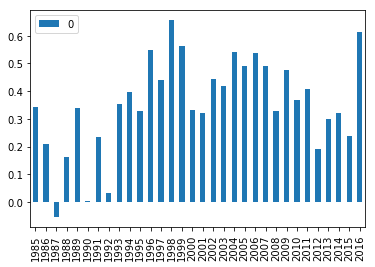

In [696]:
coefficientDF = pd.DataFrame.from_dict(coefficient_dict, orient='index')

coefficientDF.plot(kind='bar')

由上图可见，绝对多数年份里面，球队获胜场次与球队薪水这两个变量之间的相关性都在0.2到0.6之间。两者存在一定程度的正相关性。

### 2.5 绘制球队赢球场次与薪水的分布图

在上一小节，我们着重分析了自1985年历年以来，球队获胜场次与球队薪水之间的相关系数变化走势。

现在我们通过绘制两个变量之间每一年的相互关系分布图，来探索它们之间的关系。

我们以最近的2016年为例

In [697]:
from matplotlib.ticker import FuncFormatter
from scipy import stats

In [698]:
# 对数字进行格式化
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)


def draw_wins_salary_points(teams, year):
    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    # draw points by team
    for teamID in teams_year.index:
        win_time = teams_year['W'][teamID]
        team_salary = teams_year['salary'][teamID]
        ax.scatter(win_time, team_salary,  color="blue", s=200)
        
    # draw linear regression line
    salaries = teams_year['salary'].values
    win_times = teams_year['W'].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(win_times,salaries)
    line1 = intercept + slope*win_times
    plt.plot(win_times, salaries,'o', win_times, line1)
    
    ax.yaxis.set_major_formatter(formatter) 
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylabel('Salaries', fontsize=20)
    ax.set_xlabel('Wins' , fontsize=20)
    ax.set_title('Wins - Salaries: '+ str(year), fontsize=25, fontweight='bold')
    plt.show()

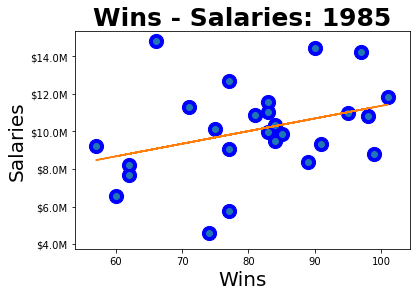

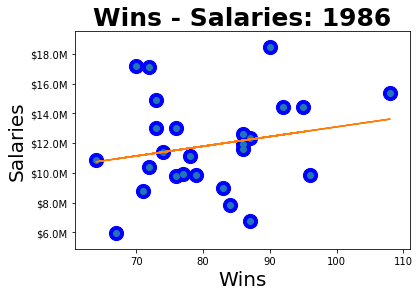

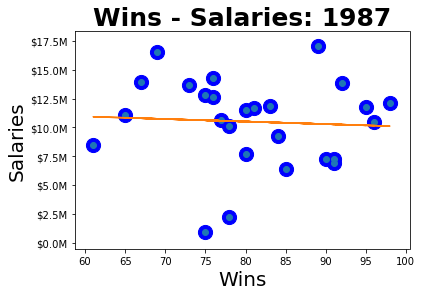

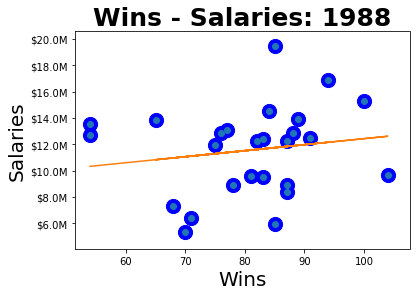

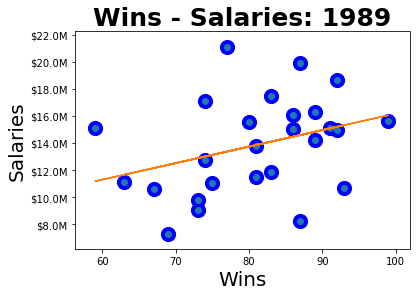

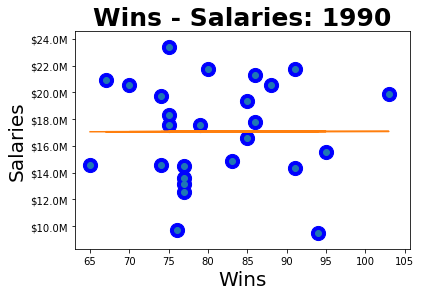

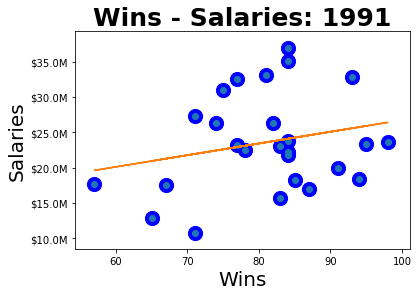

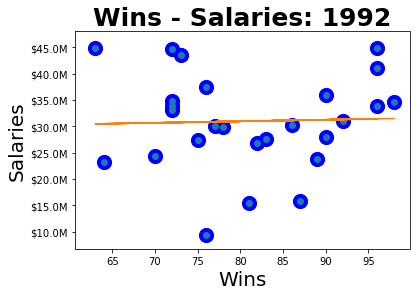

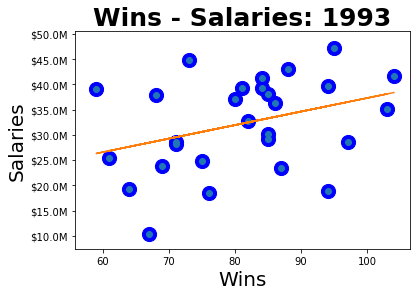

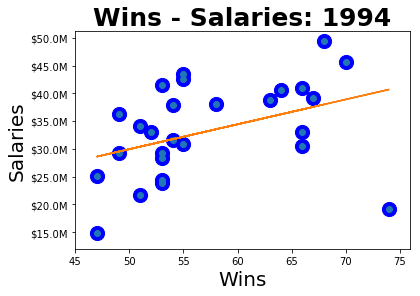

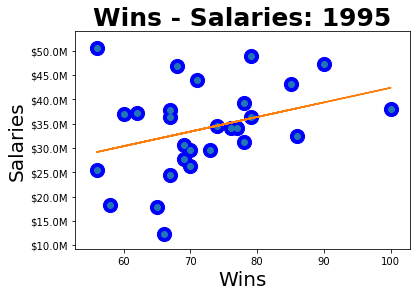

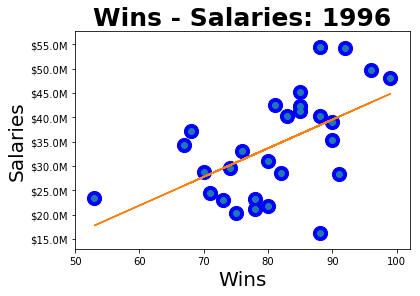

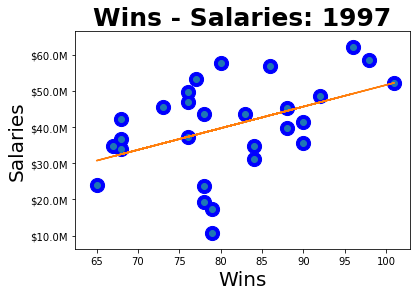

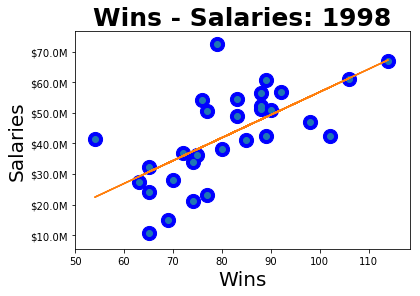

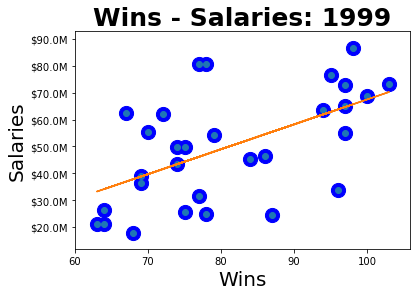

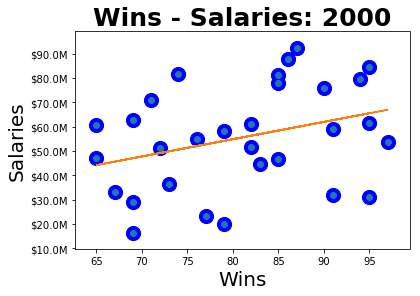

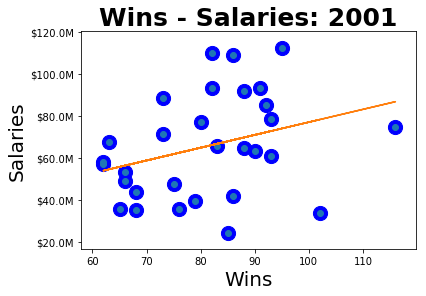

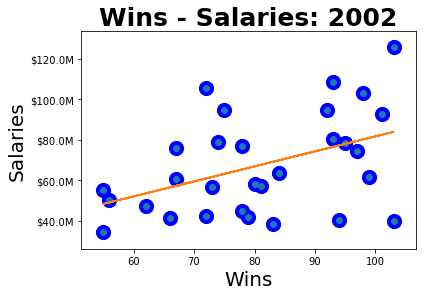

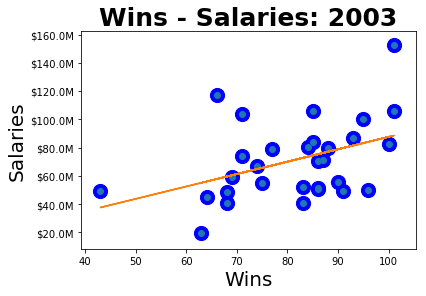

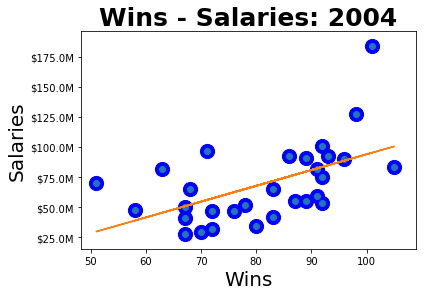

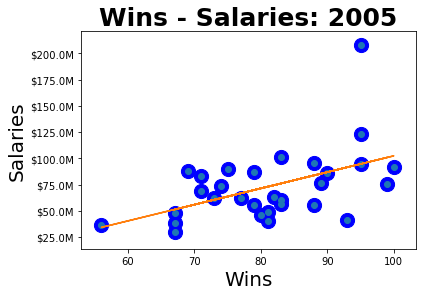

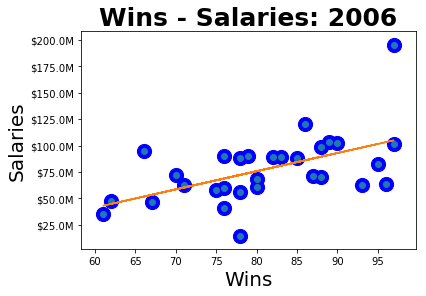

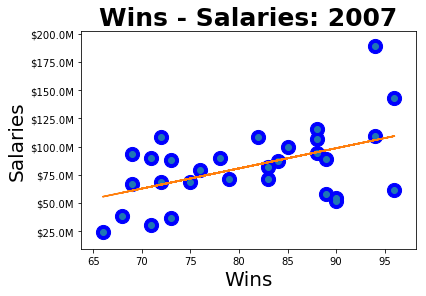

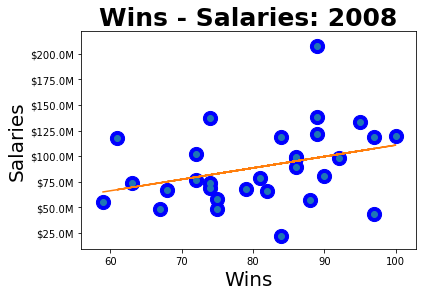

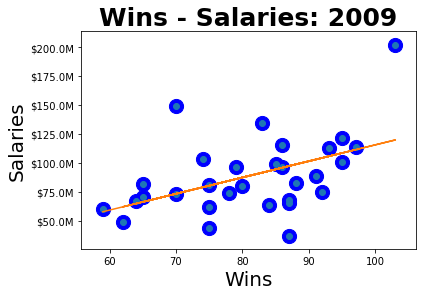

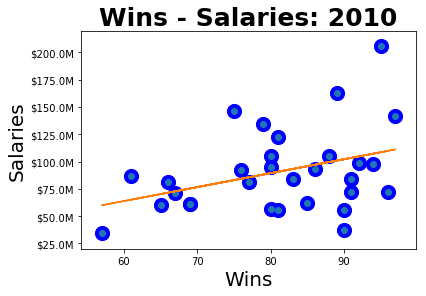

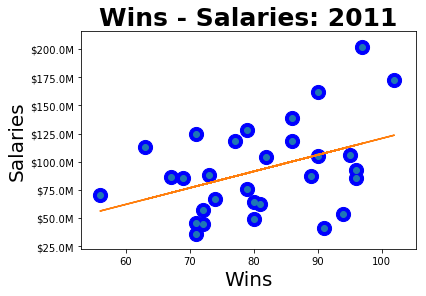

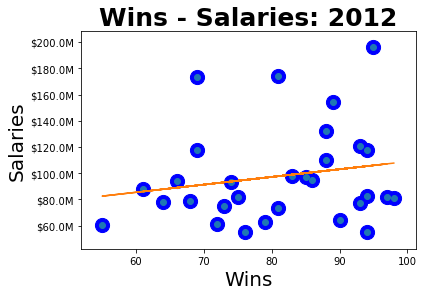

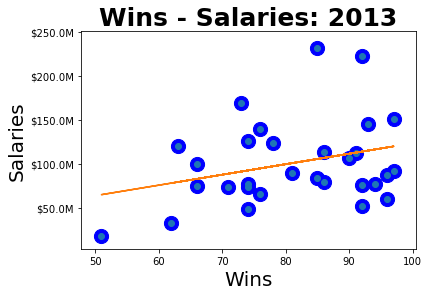

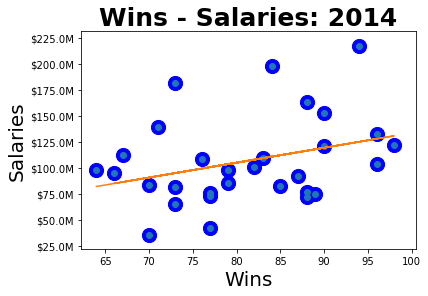

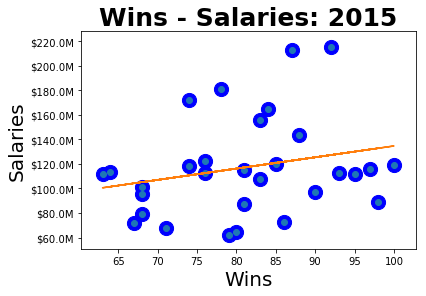

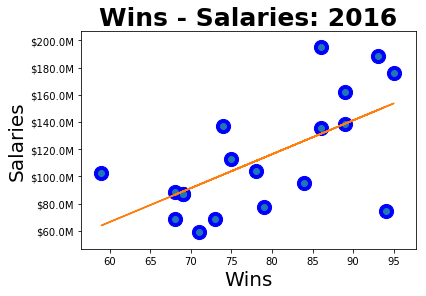

In [699]:
yearID_array = coefficientDF.index.values

# 绘制1985年至2016年以来球队获胜场次与薪水之间关系的点状分布图
# 其中每一个点代表一个球队
for yearID in yearID_array:
    draw_wins_salary_points(teamsSalariesJoinedDF, int(yearID))
    


### 2.6 结论

我们在年份分布图里面对球队获胜场次与薪水之间的关系进行线性回归，用橘红色直线来代表二者之间的线性关系。

观察每张图里面的橘红色线条，再对比2.4小节的直方图，我们可以做出这样的判断：

球队获胜场次与薪水之间存在一定的正相关，但是这种相关程度还不是足够强烈（相关因数达到0.8以上）。

这说明，还有其他因素在两个正反两个方向上扰动球队获胜场次与球队薪水的正向关系。

## 3. 二维变量分析

在这个小节我们将开始进行二维变量分析。

主要尝试分析球员的身高、体重，还有年龄、球龄这两组二维变量对球员薪水的影响。

### 3.1 导入数据

In [703]:
playersFileName = './baseballdatabank-2017.1/core/Master.csv'

playersDF = pd.read_csv(playersFileName)

In [704]:
playersDF.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [ ]:
# 关联球员个人数据和全体薪水数据
playerSalaryDF = playersDF.merge(salariesDF, left_on='playerID', right_on='playerID', how='inner')

playerSalaryDF.head()['weight']

In [708]:
playerSalaryDF.head()['height']

0    75.0
1    75.0
2    75.0
3    75.0
4    75.0
Name: height, dtype: float64

In [709]:
playerSalaryDF.head()['salary']

0     300000.0
1     387500.0
2     403250.0
3     419000.0
4    2750000.0
Name: salary, dtype: float64

### 3.2 体重和身高作为二维变量

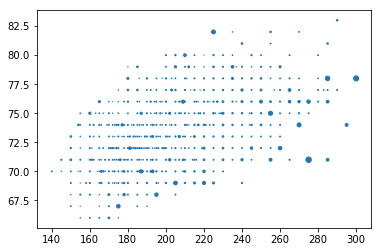

In [715]:
data_by_wh = playerSalaryDF.groupby(['weight', 'height'], as_index=False).median()
scaled_data = (data_by_wh['salary']*3)/data_by_wh['salary'].std()

# print data_by_location
# 
plt.scatter(data_by_wh['weight'], data_by_wh['height'], s=scaled_data)

### 3.3 结论